# Steps for Initial Setup -
1. Chose Pyspark kernel in Jupyter Notebook.
2. Verify if SparkContext is available
3. Load the dataset in HDFS or check the path of pre-loaded data in HDFS which is /gldata/Churn.csv and /gldata/Churntest.csv 
   If you want to check the data, access it through Hue- HDFS browser.
4. Learn how to work with Spark Dataframe, Pandas Dataframe and Spark ML Pipeline.

# Steps for Project

1. Create and Check Spark Context for Pyspark shell.
2. Load necessary libraries
3. Check the informtion provided about data.
4. Import the data files provided from HDFS (Churn.csv and Churntest.csv).
5. Display the data in Spark Dataframe. ( Note:: In pyspark, dataframe index the rows from 0 instead of 1)
6. Do data pre-processing required.( Hint - We have some variables which should be of categorical datatype but they are of type integer. Convert them)
7. Do exploratory data analysis.
            7.1 - Describe the data using describe function and state your insights.
            7.2 - Create Histogram for Day minutes spent by customers for churn=0 and 1 values.
            7.3 - Create count plots for Number of customers opt voicemail plan with Churn values.
            7.4 - Create count plots for International Plan opt by customer with Churn values.
            7.5 - Plot Areawise churner and non-churner.
            7.6 - Get correlation matrix using corr() function.
8. Get correlation between Predicting Variable and independent variable and state your insights.
    (Now that we want to predict which customer is going to churn, let’s see what columns might be         interesting for our prediction.One way is to find the correlation between "Churn" and each of         the other columns.This will show us which other columns might predict "Churn" the best.)
9. Applying Machine Learning Model
            9.1 - Import necessary libraries
            9.2 - Create vectors of all indepandant variables (Hint - use VectorAssembler)
            9.3 - Apply Decision Tree Classifier using dependent and independent variables.
            9.4 - Create pipeline to build the classifier.
            9.5 - Use startified sampling to get a sample of data.
            9.6 - Split the data into train and test dataset.
            9.7 - Make predictions and validate your model by calculating accuracy score.
            9.8 - Calculate recall and precision score.
            9.9 - Test the model using test data and calculate accuracy, recall and precision.
            9.10- Repeat steps from 9.3 to 9.9 for Random-forest and Gradient-Boost Classifiers.
10. State your insights and conclusions from the above analysis.
            

# About the Data

The dataset is about telecom industry which tells about the number of customers who churned the service. It consists of 3333 observations having 21 variables. We have to predict which customer is going to churn the service.

Account.Length: how long account has been active.

VMail.Message: Number of voice mail messages send by the customer.

Day.Mins: Time spent on day calls.

Eve.Mins: Time spent on evening calls.

Night.Mins: Time spent on night calls.

Intl. Mins: Time spent on international calls.

Day.Calls: Number of day calls by customers.

Eve.Calls: Number of evening calls by customers.

Intl.Calls: Number of international calls.

Night.Calls: Number of night calls by customer.

Day.Charge: Charges of Day Calls.

Night.Charge: Charges of Night Calls.

Eve.Charge: Charges of evening Calls.

Intl.Charge: Charges of international calls.

VMail.Plan: Voice mail plan taken by the customer or not.

State: State in Area of study.

Phone: Phone number of the customer.

Area.Code: Area Code of customer.

Int.l.Plan: Does customer have international plan or not.

CustServ.Calls: Number of customer service calls by customer.

Churn : Customers who churned the telecom service or who doesn’t(0=“Churner”, 1=“Non-Churner”)

# Get started 

# Loading the Data and Pre-Processing

In [1]:
sc

''

#### Loading Libraries

In [2]:
##We have to load libraries before we start our analysis. 

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import numpy as np
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext,SparkConf,SQLContext
import seaborn as sns

from pyspark.ml.feature import StringIndexer

In [3]:
import os

os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk1.8.0_202'

conf = SparkConf().set('spark.driver.host', '127.0.0.1')
sc = SparkContext(master='local', appName='myAppName', conf=conf)
spark = SQLContext(sc)

### Import the Data

We have training file contains 3333 observations with 21 variables and testing file contains  667 observations. 

In [4]:
import databricks.koalas as ks
df = ks.read_csv("Churn.csv")

### Display the dataframe
### Note:: In pyspark, dataframe index the rows from 0 instead of 1.   

 

In [5]:
df

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [6]:
df.info()

<class 'databricks.koalas.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
AccountLength    3333 non-null int32
VMailMessage     3333 non-null int32
DayMins          3333 non-null float64
EveMins          3333 non-null float64
NightMins        3333 non-null float64
IntlMins         3333 non-null float64
CustServCalls    3333 non-null int32
Churn            3333 non-null int32
IntlPlan         3333 non-null int32
VMailPlan        3333 non-null int32
DayCalls         3333 non-null int32
DayCharge        3333 non-null float64
EveCalls         3333 non-null int32
EveCharge        3333 non-null float64
NightCalls       3333 non-null int32
NightCharge      3333 non-null float64
IntlCalls        3333 non-null int32
IntlCharge       3333 non-null float64
State            3333 non-null object
AreaCode         3333 non-null int32
Phone            3333 non-null object
dtypes: float64(8), int32(11), object(2)

In [7]:
# df.nunique()

# Exploratory Data Analysis

#### Summary of Dataframe

In pyspark we use 'describe()' to display the summary of variables in dataframe. Also the describe variables doesn't
show the summary of categorical variables in dataframe. We have to explore them explicitly.

In [8]:
df.describe()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


From the obtained table we find that, summary of dataframe  includes-

**count**- displaying the number of observations in each variable.

**mean**- the mean value around which each observation lies.

**std**- standard deviation; Its a measure of how much close to the mean value the actual data points are.

**min and max**- displays the maximum and minimum value of a variable in dataframe. e.g. in variable account length the
                 service used by people for minimum 1 day and maximum for 243 days. 

**25%**- it shows the first quartile of variable e.g. if we look at the Account Length then it means 25% of the people used
         service for 74 days, similarly for other variables.

**50%**- it shows second quartile of variable e.g. in the vaiable Account Length then it means 50% of the people used service            for 101 days. 

**75%**- shows the third quartile and 75% of people used service for 127 days. 

#### Histogram for Day minutes spent by customers

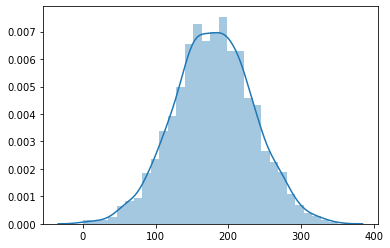

In [9]:
sns.distplot(df['DayMins'].to_numpy(),bins=30,)

The histogram shows that total day minutes spent by customers on day minutes during their service period.

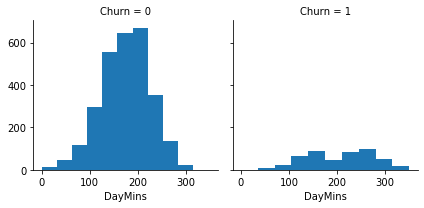

In [10]:
import seaborn as sns
g = sns.FacetGrid(df.to_pandas(), col="Churn")
g.map(plt.hist, "DayMins")


In the above plot **churn=0** shows **non-churner** and **churn=1** shows **churner**. 

#### Number of customers opt voice mail plan

In [11]:
df['VMailPlan'].value_counts()

0    2411
1     922
Name: VMailPlan, dtype: int64

We find that 2411 customers who didn't opt the voice mail plan and 922 customers who opted the voice mail plan.   

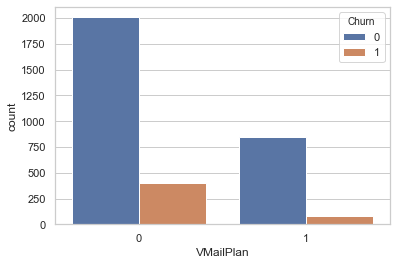

In [12]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="VMailPlan", hue= "Churn", data=df.to_pandas())

#### International Plan opt by customer 

In [13]:
df['IntlPlan'].value_counts()

0    3010
1     323
Name: IntlPlan, dtype: int64

We find that 3010 customer didn't opt international plan and 323 customers opt the international plan.

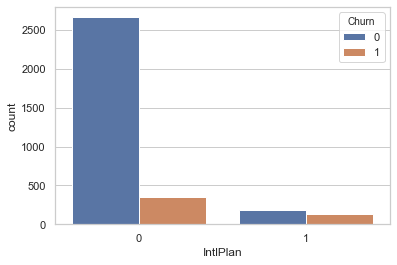

In [14]:
sns.countplot(x="IntlPlan", hue= "Churn", data=df.to_pandas())

#### Areawise churner and non-churner

In [15]:
df['AreaCode'].value_counts()

415    1655
510     840
408     838
Name: AreaCode, dtype: int64

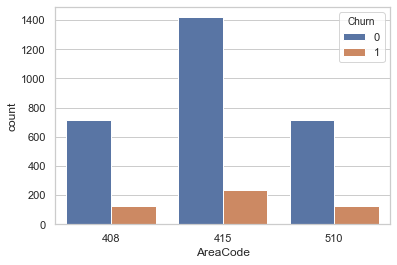

In [16]:
sns.countplot(x="AreaCode", hue= "Churn", data=df.to_pandas())

#### Correlation Matrix

In [17]:
df.corr('pearson')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
AccountLength,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMailMessage,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
DayMins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
EveMins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
NightMins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
IntlMins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServCalls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
IntlPlan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMailPlan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


### Correlation between Predicting Variable and independent variable.

Now that we want to predict which customer is going to churn, let’s see what columns might be interesting for our prediction.
One way is to find the correlation between "Churn" and each of the other columns.
This will show us which other columns might predict "Churn" the best.

In [18]:
df.corr()["Churn"]

AccountLength    0.016541
VMailMessage    -0.089728
DayMins          0.205151
EveMins          0.092796
NightMins        0.035493
IntlMins         0.068239
CustServCalls    0.208750
Churn            1.000000
IntlPlan         0.259852
VMailPlan       -0.102148
DayCalls         0.018459
DayCharge        0.205151
EveCalls         0.009233
EveCharge        0.092786
NightCalls       0.006141
NightCharge      0.035496
IntlCalls       -0.052844
IntlCharge       0.068259
AreaCode         0.006174
Name: Churn, dtype: float64

From the obtained table, we find that **Day minutes**, **Customer Serv Calls**, **Intl Plan** has weak positive correlation with predicting variable **Churn**, while **VMail Message**, **VMail Plan** and **Intl Calls** has weak negative correlation. While remaining variables has either weak positive or negative correlation. 

#### Strong Correlation lies in the range of ±0.5 to ±1

#### Weak Correlation lies in the range of ±0.1 to ±0.1

In [19]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# res=ks.DataFrame(le.fit_transform(df['State'].to_pandas()),columns=['State_new'])

In [20]:
# df=ks.merge(df,res,left_index=True,right_index=True)

In [21]:
# df=df.drop('State',axis=1)

In [22]:
df=df.drop('Phone',axis=1)

In [23]:
df.shape

(3333, 20)

# Building Machine Learning Model

Follow project step - 9

In [24]:
df.info()

<class 'databricks.koalas.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 20 columns):
AccountLength    3333 non-null int32
VMailMessage     3333 non-null int32
DayMins          3333 non-null float64
EveMins          3333 non-null float64
NightMins        3333 non-null float64
IntlMins         3333 non-null float64
CustServCalls    3333 non-null int32
Churn            3333 non-null int32
IntlPlan         3333 non-null int32
VMailPlan        3333 non-null int32
DayCalls         3333 non-null int32
DayCharge        3333 non-null float64
EveCalls         3333 non-null int32
EveCharge        3333 non-null float64
NightCalls       3333 non-null int32
NightCharge      3333 non-null float64
IntlCalls        3333 non-null int32
IntlCharge       3333 non-null float64
State            3333 non-null object
AreaCode         3333 non-null int32
dtypes: float64(8), int32(11), object(1)

In [25]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol=labelIndexer.getOutputCol(),
                            maxBins=100,
                            featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       1.0|         1.0|
|       1.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.91778 
f1 of the model is 0.916085 


In [26]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
rf = RandomForestClassifier(labelCol=labelIndexer.getOutputCol(),
                            maxBins=100,
                            featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, rf])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         0.0|
|       0.0|         1.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.915392 
f1 of the model is 0.904312 


In [27]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Load the data stored
data = df.to_spark()

# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Churn", outputCol="indexedLabel")
StateIndexer = StringIndexer(inputCol="State", outputCol="State_new")

# assemble all the columns using VectorAssembler to
assembler = VectorAssembler(inputCols=[
    'AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
    'IntlMins', 'CustServCalls', 'IntlPlan', 'VMailPlan', 'DayCalls',
    'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls', 'NightCharge',
    'IntlCalls', 'IntlCharge', 'AreaCode',
    StateIndexer.getOutputCol()
],
                            outputCol="assembler")
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol=assembler.getOutputCol(), outputCol="indexedFeatures", maxCategories=4)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
gbt = GBTClassifier(labelCol=labelIndexer.getOutputCol(),
                    maxBins=100,
                    featuresCol=featureIndexer.getOutputCol())

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(
    stages=[labelIndexer, StateIndexer, assembler, featureIndexer, gbt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel").show(5)

# # Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("accuracy of the model is %g " % (accuracy))

evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel",
                                              predictionCol="prediction",
                                              metricName="f1")
f1 = evaluator.evaluate(predictions)
print("f1 of the model is %g " % (f1))

+----------+------------+
|prediction|indexedLabel|
+----------+------------+
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
|       0.0|         0.0|
+----------+------------+
only showing top 5 rows

accuracy of the model is 0.915452 
f1 of the model is 0.915829 


# Insights and Conclusions

Follow step no 10 of Project.